# 6 вариант. Копылов В.Я. № в3530904/00022

### **Начальные условия** 

Исходное уравнение: $ W(s) = \frac{k(1+a_1*s)}{1+2 * \mu*T*s+T^2*s^2} = \frac{\bar{y}(s)}{\bar{x}(s)} = \frac{P(s)}{Q(s)} $
где: $ x(t) = const = 12, k = 2, a_1 = 2, \mu = 0.3, T = 2 $

### **Введем дополнительную переменную и создадим систему**

$ W(s) = W_1(s) * W_2(s) = \frac{1}{Q(s)} * P(s)= \frac{1}{\bar{x}(s)} * \bar{y}(s)$

Далее выразим $\bar{x}(s)$ и $\bar{y}(s)$ в единой системе:

$\bar{x}(s) = (1 + 2 * \mu*T*s+T^2*s^2) * \bar{U}(s) $

$\bar{y}(s) = (k+k*a_1*s) * \bar{U}(s) $

### **Переход в вещеcтвенную форму**

$ \bar{x}(s) = x(t) $

$ \bar{y}(s) = y(t) $

$ \bar{U}(s) = U(t) $

$ S^n \rightarrow \frac{d^n}{dt^n}$

### **Преобразуем систему**

$x(t) = U(t) + 2 * \mu * T * U^{(1)}(t) + T^2 * U^{(2)}(t) $

$y(t) = k * U(t) + k * a_1 * U^{(1)}(t)$

### **Выразим из уравнения с x(t) старшую производную**

$ U^{(2)}(t) = -(\frac{U(t) + 2 * \mu * T * U^{(1)}(t) - x(t)}{T^2})  $

### **Приведем систему к канонической форме для применения метода Эйлера**

сперва обозначим:

$z_1(t) = U(t)$

$z_2(t) = U^{(1)}(t) = z_1^{(1)}(t)$

$z_3(t) = U^{(2)}(t) = z_2^{(1)}(t)$

Получим систему уравнений:

$ z_1^{(1)}(t)  = z_2(t)$

$ z_2^{(1)}(t)  = z_3(t)$

$ z_3(t)  = -(\frac{z_1(t) + 2 * \mu * T * z_2(t) - x(t)}{T^2}) $

Выразим уравнение для y:

$y(t) = k * z_1(t) + k * a_1 * z_2(t)$

### **Проверка вычисления точки сходимости**

исходный предел для првоверки имеет вид:

$ \lim_{s \rightarrow 0}{y(t)} = \lim_{s \rightarrow 0} s * {y(s)}$

После множества преобразований получаем:
    
$ c * \lim_{s \rightarrow 0}{W(s)} $

Вычислим предел:

$ c * \lim_{s \rightarrow 0}{W(s)} = c * \lim_{s \rightarrow 0}{\frac{k(1+a_1*s)}{1+2 * \mu*T*s+T^2*s^2}} = c * \lim_{s \rightarrow 0}{\frac{k}{1}} = c * k = 12 * 2 = 24$

### **Далее приступим к вычислению точек и построению графика**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# начальные условия
xt, k, a1, mu, T = 12, 2, 2, 0.3, 2

In [9]:
# функция вычисления точек
def gen_Euler(h: float) -> float:
    """
    h: float -> шаг
    return: значение функции
    """
    z1, z2 = 0,0
    while True:
        yield (k * z1 + k * a1 * z2)
        z1 = z1 + h * z2
        z2 = z2 + h * -((z1 + 2 * mu * T * z2 - xt) / (T*T))

step: 1000 | t:5.0    	| y:37.93984115356972    | err: 0.0062944
step: 2000 | t:10.0   	| y:19.772034977406207   | err: 0.00903492
step: 3000 | t:15.0   	| y:23.797832254776615   | err: 0.00761013
step: 4000 | t:20.0   	| y:25.081219647524765   | err: 0.00321468
step: 5000 | t:25.0   	| y:23.302230737860345   | err: 0.000512437
step: 6000 | t:30.0   	| y:24.23840586199098    | err: 0.000364427
step: 7000 | t:35.0   	| y:23.99172662394127    | err: 0.000364583
step: 8000 | t:40.0   	| y:23.9525483743284     | err: 0.000169255
step: 9000 | t:45.0   	| y:24.034444559296315   | err: 3.50254e-05
step: 10000| t:50.0   	| y:23.98691159426087    | err: 1.36601e-05
step: 11000| t:55.0   	| y:24.00131513178786    | err: 1.71913e-05
step: 12000| t:60.0   	| y:24.00201359874863    | err: 8.76634e-06
step: 13000| t:65.0   	| y:23.998323485907136   | err: 2.19115e-06
step: 14000| t:70.0   	| y:24.00070302325396    | err: 4.48452e-07
step: 15000| t:75.0   	| y:23.99989066314617    | err: 7.96461e-07


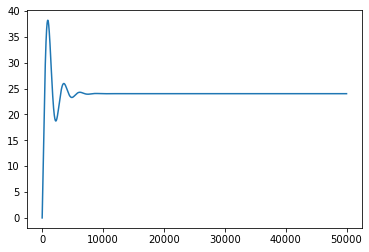

In [11]:
h = 0.005 # шаг с которым функция будет вычислять значения
f = gen_Euler(h)

border = 50000 # кол-во точек
dots = []
for _ in range(border):
    dots.append(next(f))

# вывод точек
step = 1000 # шаг для вывода точек
for i, t, dot in zip(range(border), np.arange(0, border, 0.005), dots):
    template = "step: {:<5}| t:{:<5}  \t| y:{:<20} | err: {:g}"
    if not i % step and i:
        print(template.format(i, t, dot, abs(dots[i] - dots[i-1])))
    
# Построение графика
plt.plot(dots)

## Вывод

* При шаге равном `h = 0.05` фаза успокоения, с машинным отклонением между точками в `e-03` экспоненты, наступает при 1000 шагах. При 5000 и более шагов компьютерное отклонение между точками состоявляет 0
* При шаге равном `h = 0.005` фаза успокоения, с машинным отклонением между точками в `e-05` экспоненты, наступает при 1000 шагах. При 43000 и более шагов компьютерное отклонение между точками состоявляет 0

## Урезание шагов, оптимизация графика

**Задача**: необходимо найти такой шаг, при котором график бы достигал фазы успокоения на этапе 100-200 шагов

**Решение**: данная задача достигается при шаге 0.15

step: 25   | t:3.75   	| y:36.401543580513916   | err: 0.549504
step: 50   | t:7.5    	| y:28.317634022926885   | err: 0.696474
step: 75   | t:11.25  	| y:18.93791538682245    | err: 0.0100276
step: 100  | t:15.0   	| y:23.970483010413616   | err: 0.21764
step: 125  | t:18.75  	| y:25.608873237279298   | err: 0.0606164
step: 150  | t:22.5   	| y:23.58468444138014    | err: 0.052838
step: 175  | t:26.25  	| y:23.600750654559114   | err: 0.0331185


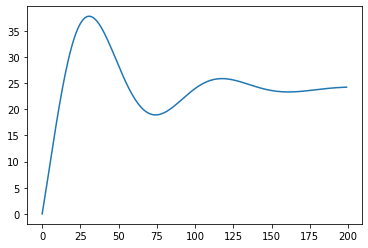

In [21]:
h = 0.15 # шаг с которым функция будет вычислять значения
f = gen_Euler(h)

border = 200 # кол-во точек
dots = []
for _ in range(border):
    dots.append(next(f))

# вывод точек
step = 25 # шаг для вывода точек
for i, t, dot in zip(range(border), np.arange(0, border, 0.15), dots):
    template = "step: {:<5}| t:{:<5}  \t| y:{:<20} | err: {:g}"
    if not i % step and i:
        print(template.format(i, t, dot, abs(dots[i] - dots[i-1])))
    
# Построение графика
plt.plot(dots)